In [55]:
import library
from importlib import reload
import matplotlib.pyplot as plt

reload(library)

<module 'library' from '/home/dario/Documents/ICD/data_science_first_project/library.py'>

### Primera visuzalizacion

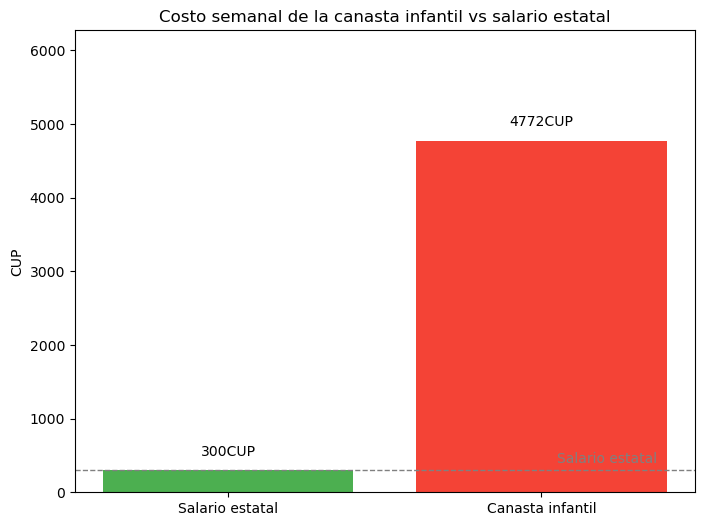

In [ ]:
mipymes = library.cargar_archivos("datos/mipymes.json")
basket = library.cargar_archivos("datos/basket.json")
peso_minimo_producto = library.peso_minimo_por_producto(mipymes)
costo_canasta_en_mipymes = library.costo_canasta_semanal_completo(mipymes, basket,peso_minimo_producto)

library.visuzalizar_canasta_vs_salario(costo_canasta_en_mipymes, salario_estatal=6000)

### Visualizacion 2

compotas
mermeladas
carnes
huevos
huevos
pañales
compotas
mermeladas
jugos
carnes
huevos
leguminosas
pañales
limpieza
capilar
corporal
cuidados
cereales
compotas
mermeladas
jugos
carnes
huevos
leguminosas
pañales
limpieza
capilar
corporal
cuidados
cereales
compotas
mermeladas
jugos
carnes
huevos
leguminosas
pañales
limpieza
capilar
corporal
cuidados
cereales


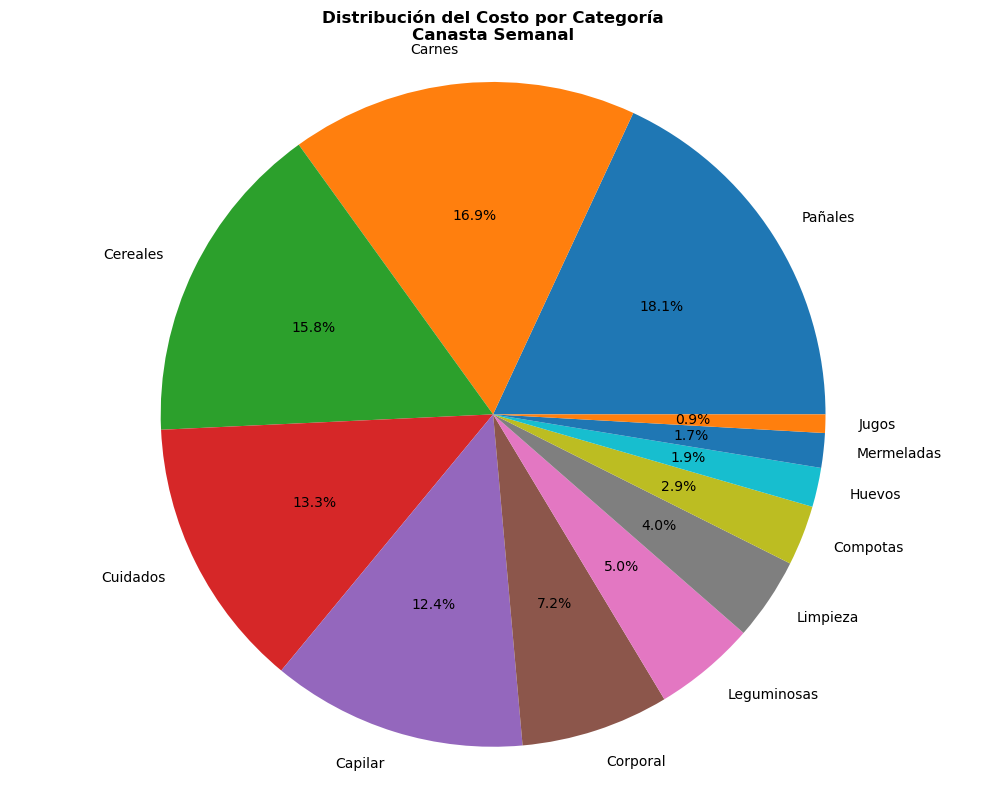

In [54]:
precio_promedio_producto = library.costo_promedio_por_producto(mipymes, basket)

library.visualizar_proporciones_minima(precio_promedio_producto, basket, costo_canasta_en_mipymes)

### Tercera Visualizacion

Para calculo de disponibilidad (%)


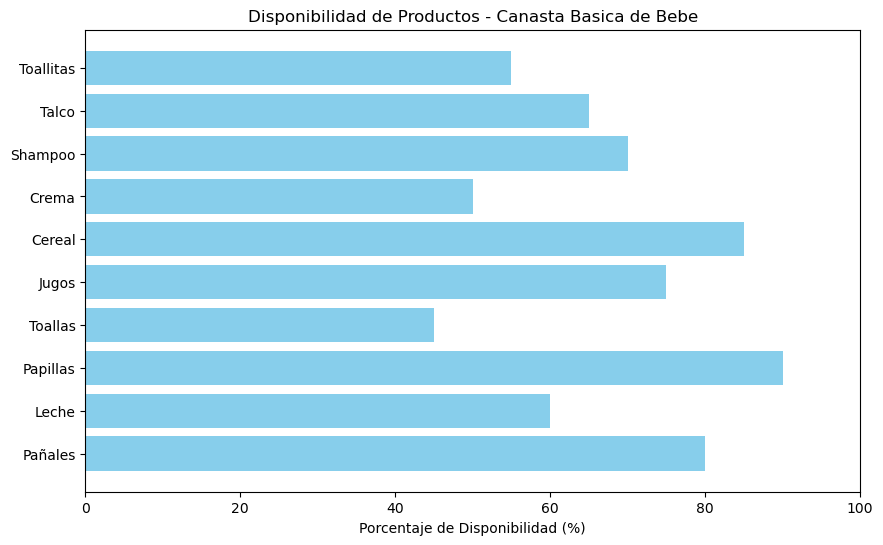

In [56]:
productos = ['Pañales', "Leche", "Papillas", "Toallas", "Jugos", "Cereal", "Crema", "Shampoo", "Talco", "Toallitas"]
disponibilidad = [80, 60, 90, 45, 75, 85, 50, 70, 65, 55]

#Crear el grafico
plt.figure(figsize=(10,6))
plt.barh(productos, disponibilidad, color='skyblue')
plt.xlabel('Porcentaje de Disponibilidad (%)')
plt.title('Disponibilidad de Productos - Canasta Basica de Bebe')
plt.xlim(0, 100)

plt.show()

### Vizualizacion 4,5: BoxPlot de Precios por tipo de Producto

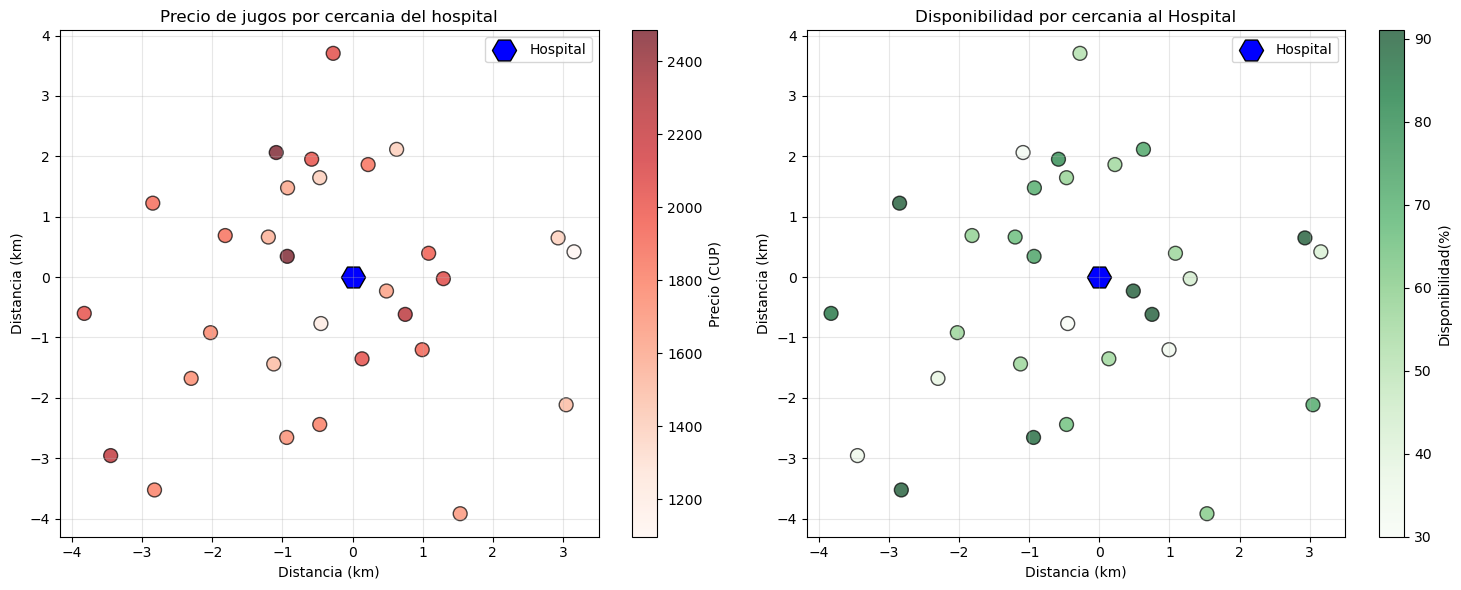

In [77]:
import numpy as np
np.random.seed(42)
n_mipymes = 30

#Coordenadas alrededor del hospital 0,0
x = np.random.normal(0,2, n_mipymes)
y = np.random.normal(0,2, n_mipymes)

precios_jugo = np.random.randint(1000, 2500, n_mipymes)
disponibilidad = np.random.randint(30, 95, n_mipymes)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

sc1 = ax1.scatter(x, y, c= precios_jugo, s=100, cmap='Reds',
                  alpha=0.7, edgecolors='black'
                  )
ax1.scatter(0, 0, color='blue', s=300, marker='H', label='Hospital', edgecolors='black')
ax1.set_title('Precio de jugos por cercania del hospital')
ax1.set_xlabel('Distancia (km)')
ax1.set_ylabel('Distancia (km)')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.colorbar(sc1, ax=ax1, label='Precio (CUP)')

#Disponibilidad por Cercania
sc2 = ax2.scatter(x, y, c=disponibilidad, s= 100,  cmap='Greens',
                  alpha=0.7, edgecolors = 'black')
ax2.scatter(0, 0, color='blue', s=300, marker='H', label='Hospital', edgecolors='black')
ax2.set_title('Disponibilidad por cercania al Hospital')
ax2.set_xlabel('Distancia (km)')
ax2.set_ylabel('Distancia (km)')
ax2.legend()
ax2.grid(True, alpha=0.3)
plt.colorbar(sc2, ax=ax2, label='Disponibilidad(%)')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Precio de jugos por cercania del hospital')